# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

**Goal:** An IPython notebook writeup that provides a dataset overview with visualizations and statistical analysis.

> By: Cecelia Shao  
> Submitted: January 25, 2018

<img src="https://i.imgur.com/uXQyEHK.png" style="height:75px;" align="left">



Your project will be assessed using the following standards, as defined by the data science workflow:


Acceptable performance for this standard is based on how well you've applied specific learning goals within your deliverable. To review the full list of data science standards, see the course syllabus.

---

## PARSE & MINE

#### Performance Evaluation

| Requirements | Incomplete (0) | Does Not Meet Expectations (1) | Meets Expectations (2) | Exceeds Expectations (3) |
|---|---|---|---|---|
| Read in your dataset, determine how many samples are present, and ID any missing data | | | | 3|
| Create a table of descriptive statistics for each of the variables (n, mean, median, standard deviation) | | | |3 |
| Describe the distributions of your data | | | | 3|
| Plot box plots for each variable | | | |3 |
| Create a correlation matrix | | | |3 |
| Determine any issues or limitations, based on your exploratory analysis | | | 2| |
| Outline exploratory analysis methods | | | | 3|

Notes:
* Your coding and explanations are orderly and helpful, good work on the organization of your notebook.
* Good use of multiple perspectives to ascertain data distribution, including boxplots, histograms and `.skew()`.
* You had good ideas about testing normality and you did a great job of going the extra mile to transform the data, given your sense about its skewness. 
* A good rule-of-thumb is that skew within `(-1,1)` can be true for data that comes from a normal distribution.
* Log transformations may not always be as obvious as you would like, but double check the scale of the numbers to see that the transformation has taken place.
---

## Score: 
Based on the requirements, you can earn a maximum of  **21**  points on this project. 

#### Your total score is: **20**


### Step 1: Load the python libraries you will need for this project 

In [3]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

/Users/freedom/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [5]:
#Read in data from source 
# df_raw = pd.read_csv("../datasets/admissions.csv")
df_raw = pd.read_csv("admissions.csv")
print (df_raw.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [6]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [7]:
# see the number of row, number of columns, data type of each column and number of non-nulls in each column.
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


Answer: 400 observations for admit (but some of the columns/features have missing values (398-399)

#### Question 2. Create a summary table

In [8]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

**Answer:** The possible range of results for GRE is much wider than the one for gpa (0-800 for GRE vs. 0-4 for gpa). 

The discrepancy in gre scores could also be attributed to the fact that there is a **wider acceptable range of gre scores** vs. GPA 

#### Question 4. Drop data points with missing data


In [9]:
df_raw_droppedNA = df_raw.dropna(axis=0, how='any')

df_raw_droppedNA.count()
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html
# https://www.oreilly.com/learning/handling-missing-data

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

**Answer:** To summarize - you can do a manual check with boolean values but also do a count of null values using isnull().sum() functions.

In [10]:
# You can confirm with a T/F, but it's not as efficient as the below with is.null().sum()
df_raw_droppedNA.isnull()

,admit,gre,gpa,prestige
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [11]:
# Better approach to confirm the lack of NA values = using the function below
df_raw_droppedNA.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### Question 6. Create box plots for GRE and GPA

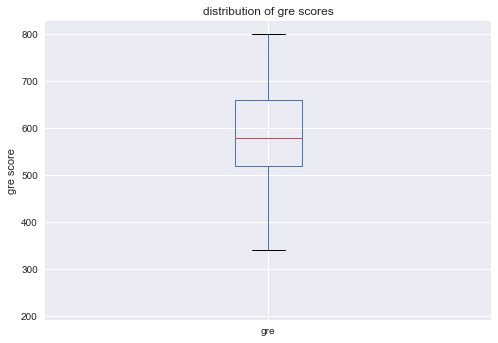

In [12]:
#boxplot 1 for gre
df_raw_droppedNA['gre'].plot(kind='box')
plt.title('distribution of gre scores')
plt.ylabel('gre score')

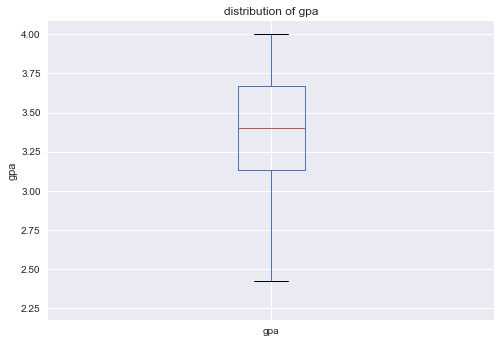

In [13]:
#boxplot 2 for gpa
df_raw_droppedNA['gpa'].plot(kind='box')
plt.title('distribution of gpa')
plt.ylabel('gpa')

#### Question 7. What do these plots show?

**Answer:** Both box plots show that there are outliers for the lower ends of both of these variables (for gpa, there is an outlier with a ~2.25 gpa and for gre, there are two outliers with ~210 and ~300 gre score).

Beyond the outliers, the distribution can also be determined for both variables. There is a clear left skew for gpa since the tail for the boxplot is much longer going towards the lower values. The median for gpa appears to be around 3.35, which matches up with the value calculated using the describe() function above (3.39), and the IQR is around ~0.5. For gpa, there is approximately a normal distribution since the median is close to the middle of the box (but not quite) and the tails are approximately similar lengths. However, the presence of the two outliers around the 200-300 range is dragging the median down to ~580 which is why it isn't exactly in the middle of the box. 


#### Question 8. Describe each distribution 

In [14]:
# sanity check skew for gpa and gre + note that there is negative skew for both gre and gpa
df_raw_droppedNA.iloc[:, 1:3].skew()

gre   -0.146047
gpa   -0.216889
dtype: float64

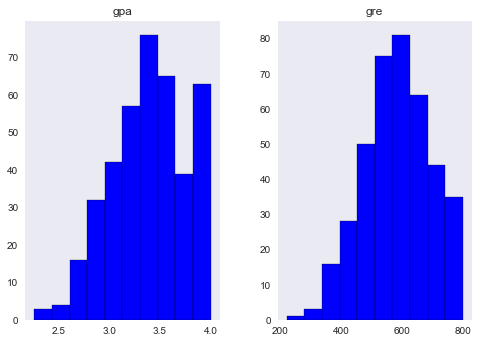

In [15]:
# confirm using a histogram

df_raw_droppedNA[['gpa', 'gre']].hist(color='blue', grid=False, edgecolor='#000000');

# for separate histograms, use the below
# df_raw_dropped.hist(column='gpa')
# df_raw_dropped.hist(column='gre')

In [17]:
for col in df_raw_droppedNA:
    print (col, df_raw_droppedNA[col].skew())

admit 0.787669147851
gre -0.146046988216
gpa -0.216888932969
prestige 0.0865055528971


In [18]:
for col in df_raw_droppedNA.iloc[:,1:3]:
    print (col, df_raw_droppedNA[col].skew())
    
# obtained from James L.

gre -0.146046988216
gpa -0.216888932969


#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, the EDA work we did in terms of looking at the boxplots and histograms illustrate there is skew in our datasets which means our model's assumption of a normal distribution would be violated.

In [22]:
#trying out normaltest function

from scipy import stats
normaltest_gre = stats.mstats.normaltest(df_raw_droppedNA['gre'])
normaltest_gpa = stats.mstats.normaltest(df_raw_droppedNA['gpa'])

# consolidated approach is normaltest = scipy.stats.mstats.normaltest(df_raw_droppedNA[['gpa', 'gre']])

print (normaltest_gre)
print (normaltest_gpa)
# consolidated approach --> print normaltest

# Normality test options: https://plot.ly/python/normality-test/

NormaltestResult(statistic=3.8179829306094266, pvalue=0.14822980613776662)
NormaltestResult(statistic=13.079875560916445, pvalue=0.001444578377229117)


<img src="https://i.imgur.com/uXQyEHK.png" style="height:75px;" align="left">



## I've plotted GRE and GPA below using seaborn's `distplot()`, because it allows you to overlay a normal distribution with `fit=stats.norm` parameter.

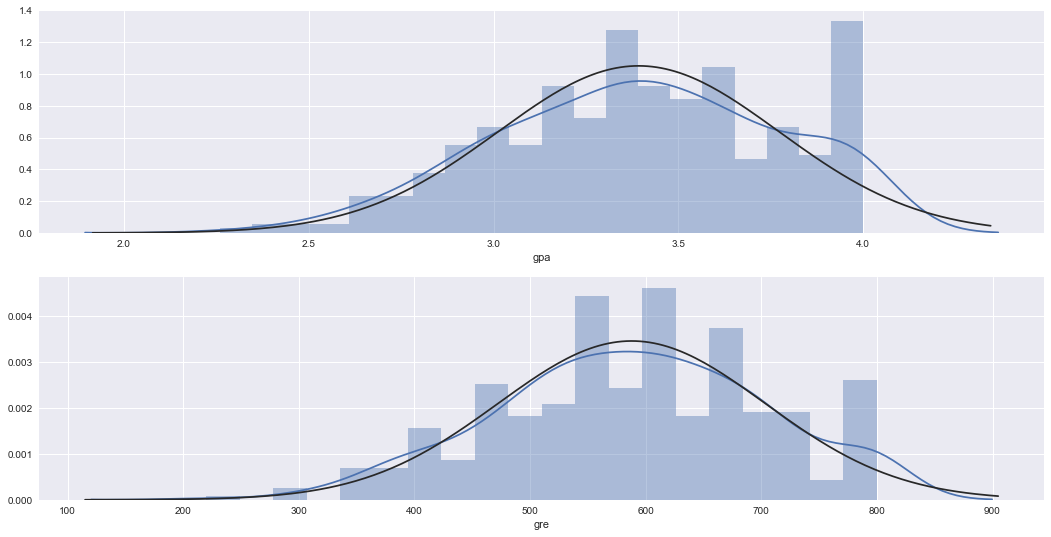

In [28]:
plt.figure(figsize=(18,9))
plt.subplot(2, 1, 1)
sns.distplot(df_raw_droppedNA['gpa'], bins = 20, fit=stats.norm)
plt.subplot(2, 1, 2)
sns.distplot(df_raw_droppedNA['gre'], bins = 20, fit=stats.norm)

The results of this normality test conflict with our EDA from above using .skew() and reviewing the histograms - the small value for gpa suggest that gpa is not skewed. (tldr = saying that I don't trust this normality test).

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, because the data's distribution is skewed (both gre and gpa), it will need correction. With skewed distributions, the extreme values in the long tails can have a disproportionately large influence on whatever test you perform or models you build. Reducing skew may improve the results of the model we build. The suggested method to correct skew is using a log transformation, but there are also many other methods for transformation (for the actual code - please see the Bonus Questions section).

> Source: http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16.html

#### Question 11. Check for colinearity

               gre       gpa  prestige
gre       1.000000  0.382408 -0.124533
gpa       0.382408  1.000000 -0.060976
prestige -0.124533 -0.060976  1.000000


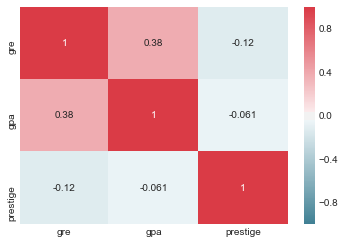

In [87]:
# create a correlation matrix for the data

cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = df_raw_droppedNA[['gre', 'gpa', 'prestige']].corr()
print(correlations)
sns.heatmap(correlations, cmap=cmap, vmin=-1, vmax=1, annot=True)

#### Question 12. What did you find for Question 11?  Which of our variables are potentially colinear? 

Answer: There is no clear correlation between any of variables (the highest value for colinearity as shown in the plot above is 0.38 between gpa and gre, which doesn't quite reach the threshold for the colinearity that I've set (0.5).

<img src="https://i.imgur.com/uXQyEHK.png" style="padding-right:15px; height:75px; " align="left" >
--


** Calculate the Variance Inflation Factors to check for Multicollinearity **
If the VIF is equal to 1 there is no multicollinearity among factors, but if the VIF is greater than 1, the predictors may be moderately correlated. The output above shows that the VIF for the Publication and Years factors are about 1.5, which indicates some correlation, but not enough to be overly concerned about. A VIF between 5 and 10 indicates high correlation that may be problematic. And if the VIF goes above 10, you can assume that the regression coefficients are poorly estimated due to multicollinearity.

In [37]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('admissions.csv')
df.dropna(inplace=True)


# get y and X dataframes based on this regression:
y, X = dmatrices('admit ~ gre+gpa+prestige', df, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,95.636229,Intercept
1,1.185563,gre
2,1.171532,gpa
3,1.015968,prestige


<img src="https://i.imgur.com/uXQyEHK.png" style="padding-right:15px; height:75px; " align="left" >

### You can see that GRE and GPA have VIF of > 1, but just barely over, so you probably do not need to remove either.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

**Answer:**

1. Confirm that we have the variables that we need in order to fit a linear regression model (gre, gpa, prestige) and conduct EDA/data prep on said variables given the provided data (see Questions 1-11 for colinearity check)
2. Confirm the hypothesis and the criteria for the decision (aka use the admit variable/outcome) (see Question 14)
3. With a special notice to significance and low multicolinearity, narrow down which variables (feature seat) we'd like to use to test our hypothesis.
3. Create dummy variables for the `prestige` since it is categorical (using get_dummies() function)
4. Create a classification model that includes `prestige` and tries to predict admission outcome. From James L: http://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.html

- Interesting post on using C() function from statsmodel to do dummy-encoding: https://www.datarobot.com/blog/multiple-regression-using-statsmodels/

- source #1: https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
- source #2: http://www.statsmodels.org/devel/example_formulas.html

#### Question 14. What is your hypothesis? 

**Answer:** My hypothesis is that higher levels of prestige for an applicant's alma mater has a positive relationship with his/her admission outcome.

Note: this is my stronger/more aggressive alternate hypothesis. The null hypothesis is the opposite, where an applicant's prestige has no association/relationship with his/her admission outcome. That being said, I could also make my alternate hypothesis more generalized and say that prestige of an applicant's alma mater has an impact on his/her admission outcome (but not specify which direction).

This set of OLS Regression results indicate that there is a slightly negative relationship between prestige and likelihood of admissions.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping observations with missing data 

As an alternative to using the .dropna function, you could also use the skipna attribute for various functions in order to skip over missing data. Bonus Question 3 also points to a method called 'imputing' which allows you to replace NaN values with other values such as mean, median, etc...

#### 2. Bonus: Log transform the skewed data

In [38]:
log_columns = ['gre', 'gpa'] 
log_academics = df_raw_droppedNA.copy()
log_academics[log_columns] = log_academics[log_columns].apply(np.log10)

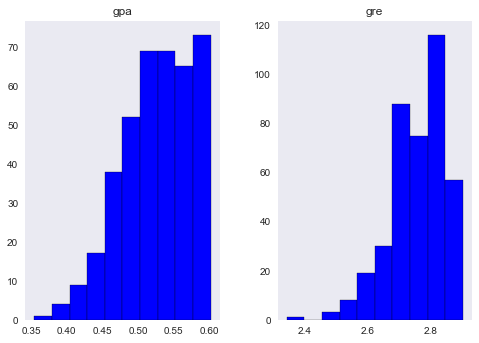

In [39]:
log_academics[['gpa', 'gre']].hist(color='blue', grid=False, edgecolor='#000000');

**After running the code for a log transformation** it seems like the log transformation did not work (data is still not normal). Time to explore other methods!

<img src="https://i.imgur.com/uXQyEHK.png" style="padding-right:15px; height:75px; " align="left" >

## Look at the range of numbers on the x-axes for the plots, and compare these plots to their originals. They are log-transformed! 

In [114]:
exp_academics = np.exp(df_raw_droppedNA.iloc[:,1:3])
exp_academics.skew()

# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.exp.html

/Users/ceceliashao/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


gre        NaN
gpa    0.46599
dtype: float64

**Another failure! Using an exponential transformation did not work either**. Using this source: http://rogeriofvieira.com/wp-content/uploads/2016/05/Data-Transformations-1.pdf, I will try taking the square root of the gre and gpa since it's only moderately negatively skewed as recommend by the PDF.

Hint: it doesn't work either...

In [117]:
sqrt_academics = np.sqrt(df_raw_droppedNA.iloc[:,1:3])
sqrt_academics.skew()

# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sqrt.html

gre   -0.426952
gpa   -0.342017
dtype: float64

In [33]:
max_gre_k = max(df_raw_droppedNA.gre) + 1
def reflect_and_transform(value):
    f = max_gre_k - value
    return np.log(f)

df_raw_droppedNA['transformed_gre'] = df_raw_droppedNA.gre.apply(reflect_and_transform)

# check by printing just the transformed_gre column
# print(df_raw_droppedNA.iloc[:,4:5])

df_raw_droppedNA.iloc[:,4:5].skew()


/Users/ceceliashao/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


transformed_gre   -2.753768
dtype: float64

#### 3. Advanced: Impute missing data

In [79]:
# fill missing values with mean column values
df_raw.fillna(df_raw.mean(), inplace=True)
# count the number of NaN values in each column
print(df_raw.isnull().sum())

# source #1: https://machinelearningmastery.com/handle-missing-data-python/
# source #2: https://www.kaggle.com/dansbecker/handling-missing-values

admit       0
gre         0
gpa         0
prestige    0
dtype: int64


In [80]:
# spot check - from James L.
df_raw.iloc[[187,236, 212]]

,admit,gre,gpa,prestige
187,0,588.040201,3.39093,2.000000
236,1,660.000000,3.39093,2.486216
212,0,588.040201,2.87000,2.000000
